## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

### Read data

In [2]:
data = pd.read_csv("/content/dataset.csv")
data.sample(5)

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
342,Pulse,32,532,30,26,1
360,Sugarcane,25,330,18,70,0
402,Sugarcane,108,198,21,60,0
454,Coffee,9,211,23,20,0
348,Sugarcane,1,440,23,67,1


### Exploratory data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CropType      501 non-null    object
 1   CropDays      501 non-null    int64 
 2   SoilMoisture  501 non-null    int64 
 3   temperature   501 non-null    int64 
 4   Humidity      501 non-null    int64 
 5   Irrigation    501 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
## Graphs of churned  customers in different Geographies

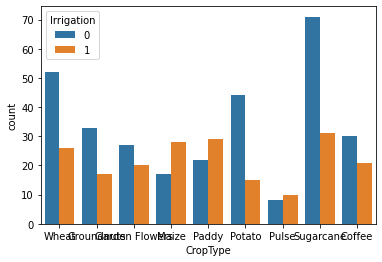

In [4]:
sns.countplot(data=data, x="CropType", hue="Irrigation")
plt.show()

In [6]:
data.shape

(501, 6)

In [7]:
data.describe()

,CropDays,SoilMoisture,temperature,Humidity,Irrigation
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,64.053892,411.391218,24.682635,39.381238,0.393214
std,45.935554,199.099590,12.111527,22.618231,0.488952
min,1.000000,120.000000,14.000000,11.000000,0.000000
25%,27.000000,230.000000,20.000000,19.000000,0.000000
50%,57.000000,369.000000,24.000000,32.000000,0.000000
75%,90.000000,554.000000,28.000000,65.000000,1.000000
max,210.000000,990.000000,263.000000,85.000000,1.000000


In [8]:
data.CropType.value_counts()

Sugarcane         102
Wheat              78
Potato             59
Paddy              51
Coffee             51
Groundnuts         50
Garden Flowers     47
Maize              45
Pulse              18
Name: CropType, dtype: int64

In [9]:
# distribution of customers who churn

data['Irrigation'].value_counts()

0    304
1    197
Name: Irrigation, dtype: int64

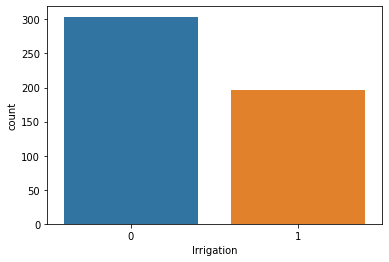

In [10]:
sns.countplot(data=data, x="Irrigation")
plt.show()

In [11]:
# check the nulls
data.isnull().sum()

CropType        0
CropDays        0
SoilMoisture    0
temperature     0
Humidity        0
Irrigation      0
dtype: int64

In [12]:
# Compare the values for both churns
data.groupby('Irrigation').mean()

,CropDays,SoilMoisture,temperature,Humidity
Irrigation,,,,
0,67.447368,300.825658,23.687500,42.851974
1,58.817259,582.010152,26.218274,34.025381


### Data Preprocessing

In [13]:
df = data.copy()

In [14]:
## Encoding the data
from sklearn.preprocessing import LabelEncoder

cat_cols =[x for x in df.columns if df[x].dtype=="object"]

le=LabelEncoder()

df = df.apply(lambda cat_cols: le.fit_transform(cat_cols.astype(str)), axis=0, result_type='expand')

In [ ]:
# df.drop(columns="CustomerId",inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CropType      501 non-null    int64
 1   CropDays      501 non-null    int64
 2   SoilMoisture  501 non-null    int64
 3   temperature   501 non-null    int64
 4   Humidity      501 non-null    int64
 5   Irrigation    501 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [17]:
df.describe()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,4.445110,92.123752,84.600798,10.514970,25.642715,0.393214
std,2.713573,46.527461,48.731554,6.069784,19.282585,0.488952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,59.000000,41.000000,6.000000,8.000000,0.000000
50%,5.000000,99.000000,81.000000,10.000000,21.000000,0.000000
75%,7.000000,130.000000,122.000000,15.000000,47.000000,1.000000
max,8.000000,162.000000,180.000000,28.000000,62.000000,1.000000


In [18]:
df.sample(5)

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
112,2,128,41,7,11,0
60,8,8,134,22,24,1
317,5,153,20,3,46,0
25,8,87,86,21,21,0
39,8,122,180,7,4,1


In [19]:
X = df.drop(columns = 'Irrigation',axis = 1)
y = df['Irrigation']

### Modelling

In [20]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(400, 5) (101, 5) (400,) (101,)


In [22]:
lr =  LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train,y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
lr_preds = lr.predict(X_test)
dt_preds = dt.predict(X_test)

In [24]:
lr_pred = accuracy_score(lr_preds, y_test)
dt_pred = accuracy_score(dt_preds, y_test)
print(lr_pred)
print(dt_pred)


0.8910891089108911
0.9306930693069307


In [25]:
# Create new data out of the samples
df.to_csv("CropType_data1.csv")
df.to_csv("CropType_data2.csv")

In [26]:
# shuffle the data

df_shuffled = shuffle(df, random_state=42)

In [27]:
sample_size = 250
s_size = 7000

In [28]:
sample1 = df_shuffled[:sample_size].copy()

In [29]:
sample2 = df_shuffled[sample_size:].copy()

In [30]:
sample1.shape

(250, 6)

In [31]:
sample2.shape

(251, 6)

In [32]:
# Create new data out of the samples
sample1.to_csv("data3.csv")
sample2.to_csv("data4.csv")

In [33]:
df.CropType.value_counts()

7    102
8     78
5     59
4     51
0     51
2     50
1     47
3     45
6     18
Name: CropType, dtype: int64

In [35]:
df1 = df_shuffled[df_shuffled['CropType'].isin([7,8,5,6])]
df2 = df_shuffled[df_shuffled['CropType'].isin([0,1,2,3,4])]
print(df1.shape)
print(df2.shape)


(257, 6)
(244, 6)


In [38]:
df1.sample(20)

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
397,7,161,68,7,47,0
326,5,9,25,7,47,0
353,7,10,57,4,50,0
72,8,38,150,10,23,0
301,5,120,59,2,50,0
282,5,78,58,1,52,0
329,5,15,155,5,44,1
290,5,95,19,5,49,0
437,7,61,96,18,6,0
294,5,104,145,3,47,1


In [39]:
# Create new data out of the samples
df1.to_csv("client1.csv")
df2.to_csv("client2.csv")

In [40]:
df_shuffled.to_csv("data5.csv")

In [1]:
from types import new_class
from typing import Tuple, Union, List
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('/home/ba-gardasd/FL/LR/client2.csv')
print(data)
data.rename({"Unnamed: 0":"a"}, axis=1, inplace=True)

        # Then, drop the column as usual.

data.drop(["a"], axis=1, inplace=True)
#print(data)
data.reset_index(drop=True)
#data.reset_index(drop=True)
#data1 = data.pop(data.columns[0])
#print(data1)
# print(data.reset_index(drop=True))

X = data.drop(columns=['Irrigation'], axis=1)
#print("df x :",x)
y = data['Irrigation']
print(y.shape)
dfX = np.array(X)
y =np.array(y)
print(y.shape)

# Standardizing the features
x = StandardScaler().fit_transform(dfX)
    
""" Select the 80% of the data as Training data and 20% as test data """
#x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
   # return (x_train, y_train), (x_test, y_test)

     Unnamed: 0  CropType  CropDays  SoilMoisture  temperature  Humidity  \
0           155         1       133            31            4        52   
1           104         2       112           104           14         7   
2           124         2       157            41            7         7   
3           451         0        86            25            8        18   
4           194         3       104            70           21        20   
..          ...       ...       ...           ...          ...       ...   
239         500         0         3            29            7         3   
240         188         3        92            96           14        10   
241         106         2       116            46            7         5   
242         270         4         2            76           12        25   
243         102         2       107           155            9         7   

     Irrigation  
0             0  
1             0  
2             0  
3             0

' Select the 80% of the data as Training data and 20% as test data '